In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp


# Data Loading of samples without max length limit

In [7]:
outlines_data = pd.read_csv('results/outlines_10k_length_n.csv')
pdfa_data = pd.read_csv('results/pdfa_10k_all_tokens_length_n.csv')
llm_data = pd.read_csv('results/llm_10k_all_tokens_length_n.csv')

# Results Analysis

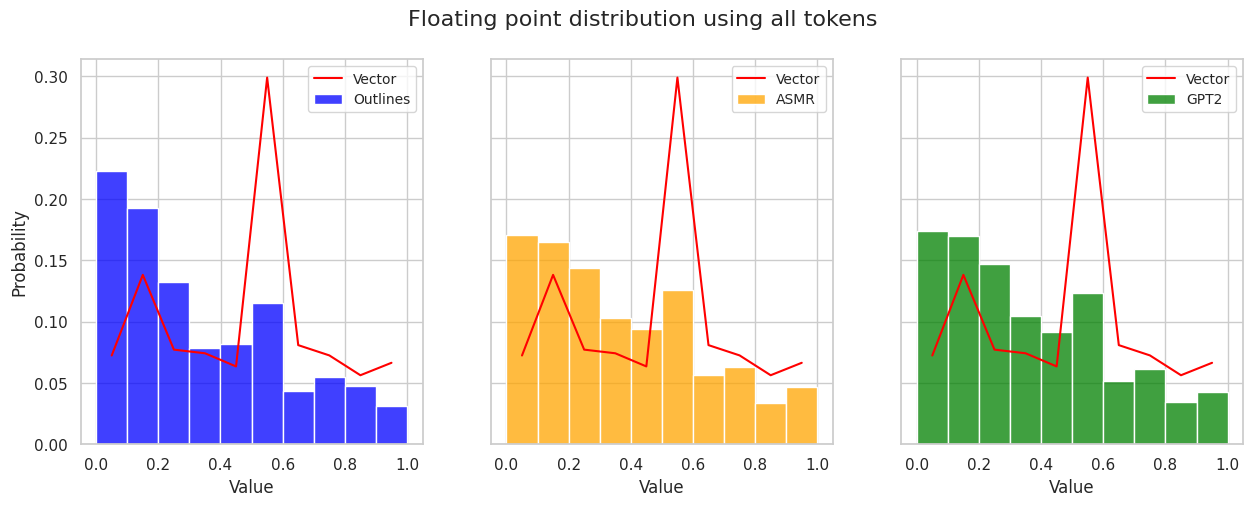

In [9]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.histplot(outlines_data['floating-point'], bins=10, stat='probability', label='Outlines', ax=axs[0], color = 'blue')
sns.histplot(pdfa_data['floating-point'], bins=10, stat='probability', label='ASMR', ax=axs[1], color='orange')
sns.histplot(llm_data['floating-point'], bins=10, stat='probability', label='GPT2', ax=axs[2], color='green')

#this is the same vector of probabilities used in the length1 notebook, cause we only using 10 bins
vector = [0.07235368508406921, 0.1380868579365871, 0.07713241182190415, 0.07416619932308573, 0.06344642027043924, 0.29891086356400415, 0.08080755356832184, 0.07243128692171712, 0.05626469225328908, 0.0664000292565824]
for i, ax in enumerate(axs):
    ax.plot([i/10 + 0.05 for i in range(10)], vector, color='red', label='Vector')
    
fig.suptitle('Floating point distribution using all tokens', fontsize=16)
for ax in axs:
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Probability', fontsize=12)
    ax.legend(fontsize=10)

plt.show()


/tmp/ipykernel_10242/2781637607.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(outlines_data["floating-point"].values, label='Outlines', color='blue', shade=True)
/tmp/ipykernel_10242/2781637607.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pdfa_data["floating-point"].values


Kolmogorov-Smirnov: 0.2869
P-value: 1e-323


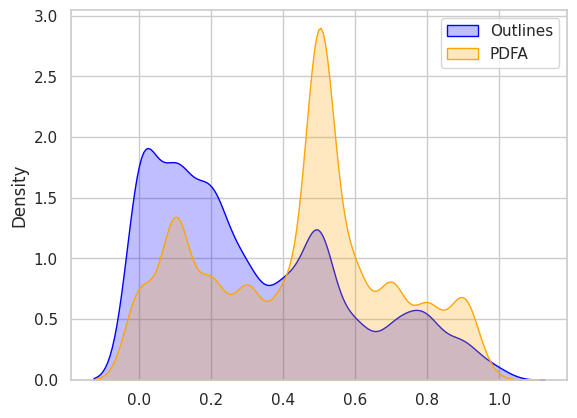

In [5]:


sns.kdeplot(outlines_data["floating-point"].values, label='Outlines', color='blue', shade=True)
sns.kdeplot(pdfa_data["floating-point"].values
, label='PDFA', color='orange', shade=True)

ks, p_value = ks_2samp(outlines_data["floating-point"].values, pdfa_data["floating-point"].values
)

print("Kolmogorov-Smirnov:", ks)
print("P-value:", p_value)

plt.legend()
plt.show()


/tmp/ipykernel_10242/4130080694.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(llm_data["floating-point"].values, label='GPT2', color='blue', shade=True)


/tmp/ipykernel_10242/4130080694.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pdfa_data["floating-point"].values


Kolmogorov-Smirnov: 0.0439
P-value: 8.491643077615723e-09


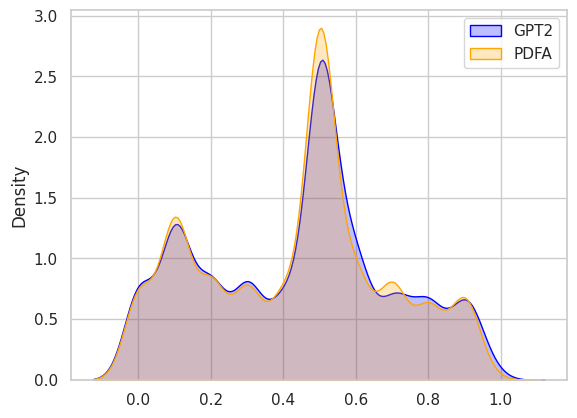

In [8]:


sns.kdeplot(llm_data["floating-point"].values, label='GPT2', color='blue', shade=True)
sns.kdeplot(pdfa_data["floating-point"].values
, label='PDFA', color='orange', shade=True)

ks, p_value = ks_2samp(llm_data["floating-point"].values, pdfa_data["floating-point"].values
)

print("Kolmogorov-Smirnov:", ks)
print("P-value:", p_value)

plt.legend()
plt.show()
